<a href="https://colab.research.google.com/github/baeksumin/k-project/blob/main/modeling_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 전처리

In [ ]:
import numpy as np
from google.colab import drive
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn import metrics

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/[Shared]K-Project/data/mktcap_top10/KR7006840003.csv')

In [ ]:
data

,TRD_DD,GDC_sig,RSI_sig,ROC_sig,MAP_sig,STC_sig,TREND
0,2021/12/30,0,0,0,0,0,NaN
1,2021/12/29,0,0,0,0,0,NaN
2,2021/12/28,0,0,0,0,0,NaN
3,2021/12/27,0,0,0,0,0,NaN
4,2021/12/24,0,0,0,0,0,NaN
...,...,...,...,...,...,...,...
5525,1999/08/17,0,0,1,0,0,NaN
5526,1999/08/16,0,0,1,1,0,NaN
5527,1999/08/13,0,0,1,1,0,NaN
5528,1999/08/12,0,0,1,1,0,NaN


In [ ]:
data['TREND'].isnull().sum()

24

In [ ]:
data['TREND'] = data['TREND'].fillna(0)

In [ ]:
data.isnull().sum()

TRD_DD     0
GDC_sig    0
RSI_sig    0
ROC_sig    0
MAP_sig    0
STC_sig    0
TREND      0
dtype: int64

In [ ]:
data[0.1 < data['TREND']]

,TRD_DD,GDC_sig,RSI_sig,ROC_sig,MAP_sig,STC_sig,TREND
17,2021/12/07,0,0,0,0,0,1.000000
18,2021/12/06,0,0,0,0,0,0.714286
58,2021/10/08,0,0,0,0,0,0.164835
59,2021/10/07,0,0,0,0,0,0.186813
60,2021/10/06,0,0,0,0,0,0.208791
...,...,...,...,...,...,...,...
5508,1999/09/09,0,0,-1,0,0,0.555556
5509,1999/09/08,0,0,-1,0,0,0.444444
5510,1999/09/07,0,0,-1,0,0,0.333333
5511,1999/09/06,0,0,-1,0,0,0.222222


In [ ]:
#최신 데이터가 뒤로 오도록 정렬
data = data.sort_values(by=['TRD_DD'])
data.set_index('TRD_DD',drop=True,inplace=True)
data.reset_index('TRD_DD',drop=False,inplace=True)
data

,TRD_DD,GDC_sig,RSI_sig,ROC_sig,MAP_sig,STC_sig,TREND
0,1999/08/11,0,0,-1,1,0,0.0
1,1999/08/12,0,0,1,1,0,0.0
2,1999/08/13,0,0,1,1,0,0.0
3,1999/08/16,0,0,1,1,0,0.0
4,1999/08/17,0,0,1,0,0,0.0
...,...,...,...,...,...,...,...
5525,2021/12/24,0,0,0,0,0,0.0
5526,2021/12/27,0,0,0,0,0,0.0
5527,2021/12/28,0,0,0,0,0,0.0
5528,2021/12/29,0,0,0,0,0,0.0


In [ ]:
Y_colname = ['TREND'] #종속변수
X_remove = ['TRD_DD']
X_colname = [x for x in data.columns if x not in Y_colname + X_remove] #입력변수들
X_colname

['GDC_sig', 'RSI_sig', 'ROC_sig', 'MAP_sig', 'STC_sig']

In [ ]:
def datasplit(df, Y_colname, X_colname): #데이터 분리 함수
  df_train = df.loc[0 : round(len(df) * 0.75)] 
  df_test = df.loc[round(len(df) * 0.75) + 1 : ]
  Y_train = df_train[Y_colname]
  X_train = df_train[X_colname]
  Y_test = df_test[Y_colname]
  X_test = df_test[X_colname]
  return X_train, X_test, Y_train, Y_test

In [ ]:
X_train, X_test, Y_train, Y_test = datasplit(data, Y_colname, X_colname)

In [ ]:
print('X_train :', X_train.shape, 'Y_train :', Y_train.shape) 
print('X_test :', X_test.shape, 'Y_test :', Y_test.shape)

X_train : (4149, 5) Y_train : (4149, 1)
X_test : (1381, 5) Y_test : (1381, 1)


In [ ]:
Y_train

,TREND
0,0.000000
1,0.000000
2,0.000000
3,0.000000
4,0.000000
...,...
4144,-0.333333
4145,-0.250000
4146,-0.166667
4147,-0.083333


#ML 모델 구축

1. ElasticNet

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR

In [ ]:
en_model = ElasticNet(max_iter=10000000, random_state=42) #모델 생성
en_param = {'l1_ratio' : np.arange(0.5,0.9,0.005), 
            'alpha' : np.arange(0.0005,0.01,0.0005)} # 최적화할 파라미터 범위 지정
clf = GridSearchCV(estimator=en_model, param_grid=en_param, n_jobs=-1, verbose=3) # 최적화
clf.fit(X_train, Y_train) #모델 학습

Fitting 5 folds for each of 1520 candidates, totalling 7600 fits


GridSearchCV(estimator=ElasticNet(max_iter=10000000, random_state=42),
             n_jobs=-1,
             param_grid={'alpha': array([0.0005, 0.001 , 0.0015, 0.002 , 0.0025, 0.003 , 0.0035, 0.004 ,
       0.0045, 0.005 , 0.0055, 0.006 , 0.0065, 0.007 , 0.0075, 0.008 ,
       0.0085, 0.009 , 0.0095]),
                         'l1_ratio': array([0.5  , 0.505, 0.51 , 0.515, 0.52 , 0.525, 0.53 , 0.535, 0.54 ,
       0.545, 0.55 , 0.555, 0.56 , 0.565, 0.57 , 0.575, 0.58 , 0.585,
       0.59 , 0.595, 0.6  , 0.605, 0.61 , 0.615, 0.62 , 0.625, 0.63 ,
       0.635, 0.64 , 0.645, 0.65 , 0.655, 0.66 , 0.665, 0.67 , 0.675,
       0.68 , 0.685, 0.69 , 0.695, 0.7  , 0.705, 0.71 , 0.715, 0.72 ,
       0.725, 0.73 , 0.735, 0.74 , 0.745, 0.75 , 0.755, 0.76 , 0.765,
       0.77 , 0.775, 0.78 , 0.785, 0.79 , 0.795, 0.8  , 0.805, 0.81 ,
       0.815, 0.82 , 0.825, 0.83 , 0.835, 0.84 , 0.845, 0.85 , 0.855,
       0.86 , 0.865, 0.87 , 0.875, 0.88 , 0.885, 0.89 , 0.895])},
             verbose=3)

In [ ]:
clf.best_estimator_ #최적화 결과 최고의 모델

ElasticNet(alpha=0.002, l1_ratio=0.8950000000000004, max_iter=10000000,
           random_state=42)

In [ ]:
Y_train_pred = clf.predict(X_train)
Y_test_pred = clf.predict(X_test)

In [ ]:
Y_test_array = np.array(Y_test).reshape(-1,1)
real = list(Y_test_array.flatten())
Y_test_pred_array = np.array(Y_test_pred).reshape(-1,1)
pred = list(Y_test_pred_array.flatten())

In [ ]:
score_table = pd.DataFrame({'real' : real,
                            'pred' : pred})
score_table

,real,pred
0,0.250000,0.009954
1,0.333333,0.009954
2,0.416667,0.009954
3,0.500000,0.009954
4,0.750000,0.009954
...,...,...
1376,0.000000,-0.005487
1377,0.000000,-0.005487
1378,0.000000,-0.005487
1379,0.000000,-0.005487


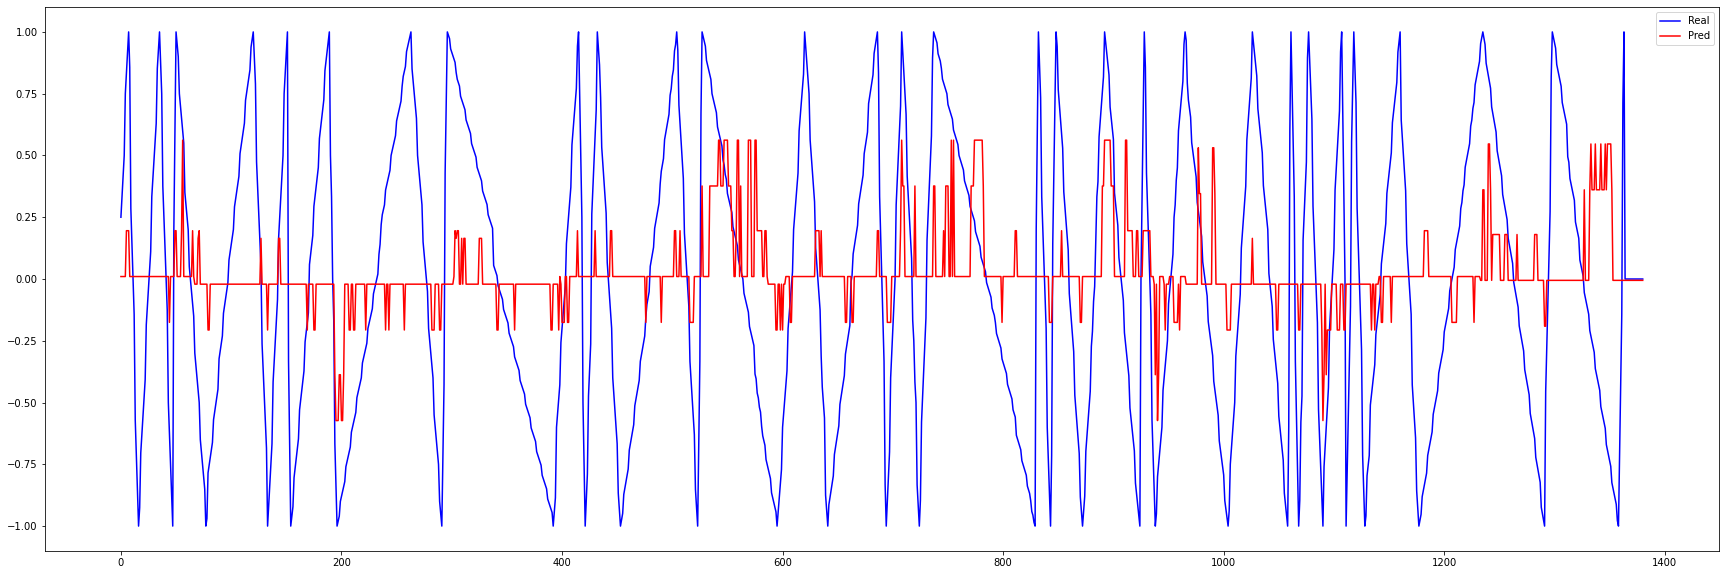

In [ ]:
plt.figure(figsize=(30,10))
plt.plot(score_table['real'], 'b-', label = 'Real')
plt.plot(score_table['pred'], 'r-', label = 'Pred')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
print("Train MSE :", mean_squared_error(Y_train_pred, Y_train))
print("Test MSE :", mean_squared_error(Y_test_pred, Y_test))

Train MSE : 0.32949705858274614
Test MSE : 0.32828917795778695


2. randomforest

In [ ]:
rf_model = RandomForestRegressor(n_jobs=-1, random_state=42)
rf_param = {'n_estimators' : range(100,200,10),
            'max_depth' : range(50, 100, 5),
            'min_samples_split' : range(1,10,1)}
clf = GridSearchCV(estimator=rf_model, param_grid=rf_param, n_jobs=-1, verbose=3) # 최적화
clf.fit(X_train, Y_train) #모델 학습

Fitting 5 folds for each of 900 candidates, totalling 4500 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
500 fits failed out of a total of 4500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
500 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "/usr/local/lib/python3.7/dist-packages/joblib/parallel.py", line 1056, in __call__
    self.retrieve()
  File "/usr/local/lib/python3.7/dist-packages/joblib/parallel.py", line 935

GridSearchCV(estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': range(50, 100, 5),
                         'min_samples_split': range(1, 10),
                         'n_estimators': range(100, 200, 10)},
             verbose=3)

In [ ]:
clf.best_estimator_

RandomForestRegressor(max_depth=50, min_samples_split=9, n_estimators=190,
                      n_jobs=-1, random_state=42)

In [ ]:
Y_train_pred = clf.predict(X_train)
Y_test_pred = clf.predict(X_test)

In [ ]:
Y_test_array = np.array(Y_test).reshape(-1,1)
real = list(Y_test_array.flatten())
Y_test_pred_array = np.array(Y_test_pred).reshape(-1,1)
pred = list(Y_test_pred_array.flatten())

In [ ]:
score_table = pd.DataFrame({'real' : real,
                            'pred' : pred})
score_table

,real,pred
0,0.250000,0.191193
1,0.333333,0.014813
2,0.416667,0.014813
3,0.500000,0.014813
4,0.750000,0.014813
...,...,...
1376,0.000000,0.014813
1377,0.000000,0.014813
1378,0.000000,0.014813
1379,0.000000,0.014813


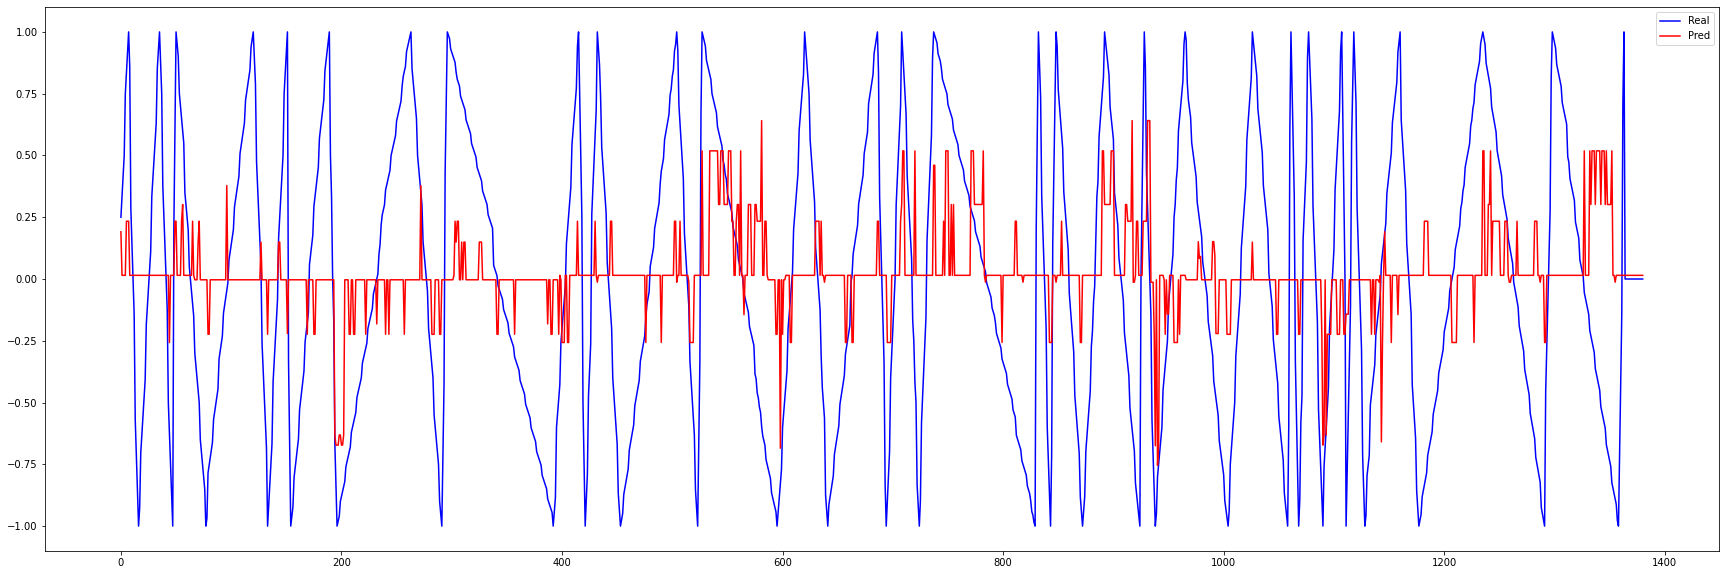

In [ ]:
plt.figure(figsize=(30,10))
plt.plot(score_table['real'], 'b-', label = 'Real')
plt.plot(score_table['pred'], 'r-', label = 'Pred')
plt.legend()
plt.show()

In [ ]:
print("Train MSE :", mean_squared_error(Y_train_pred, Y_train))
print("Test MSE :", mean_squared_error(Y_test_pred, Y_test))

Train MSE : 0.3248512047777594
Test MSE : 0.3249817885821627


3. xgb

In [ ]:
xgb_model = XGBRegressor(n_jobs=-1, random_state=42)
xgb_param = {'n_estimators' : range(100, 300, 20),
             'max_depth' : range(5, 30, 1)}
xgb_clf = GridSearchCV(estimator=xgb_model, param_grid=xgb_param, n_jobs=-1, verbose=3) # 최적화
xgb_clf.fit(X_train, Y_train) #모델 학습

Fitting 5 folds for each of 250 candidates, totalling 1250 fits
[02:33:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(estimator=XGBRegressor(n_jobs=-1, random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(5, 30),
                         'n_estimators': range(100, 300, 20)},
             verbose=3)

In [ ]:
xgb_clf.best_estimator_

XGBRegressor(max_depth=8, n_jobs=-1, random_state=42)

In [ ]:
Y_train_pred = xgb_clf.predict(X_train)
Y_test_pred = xgb_clf.predict(X_test)

In [ ]:
Y_test_array = np.array(Y_test).reshape(-1,1)
real = list(Y_test_array.flatten())
Y_test_pred_array = np.array(Y_test_pred).reshape(-1,1)
pred = list(Y_test_pred_array.flatten())

In [ ]:
score_table = pd.DataFrame({'real' : real,
                            'pred' : pred})
score_table

,real,pred
0,0.250000,0.190963
1,0.333333,0.014083
2,0.416667,0.014083
3,0.500000,0.014083
4,0.750000,0.014083
...,...,...
1376,0.000000,-0.003228
1377,0.000000,-0.003228
1378,0.000000,-0.003228
1379,0.000000,-0.003228


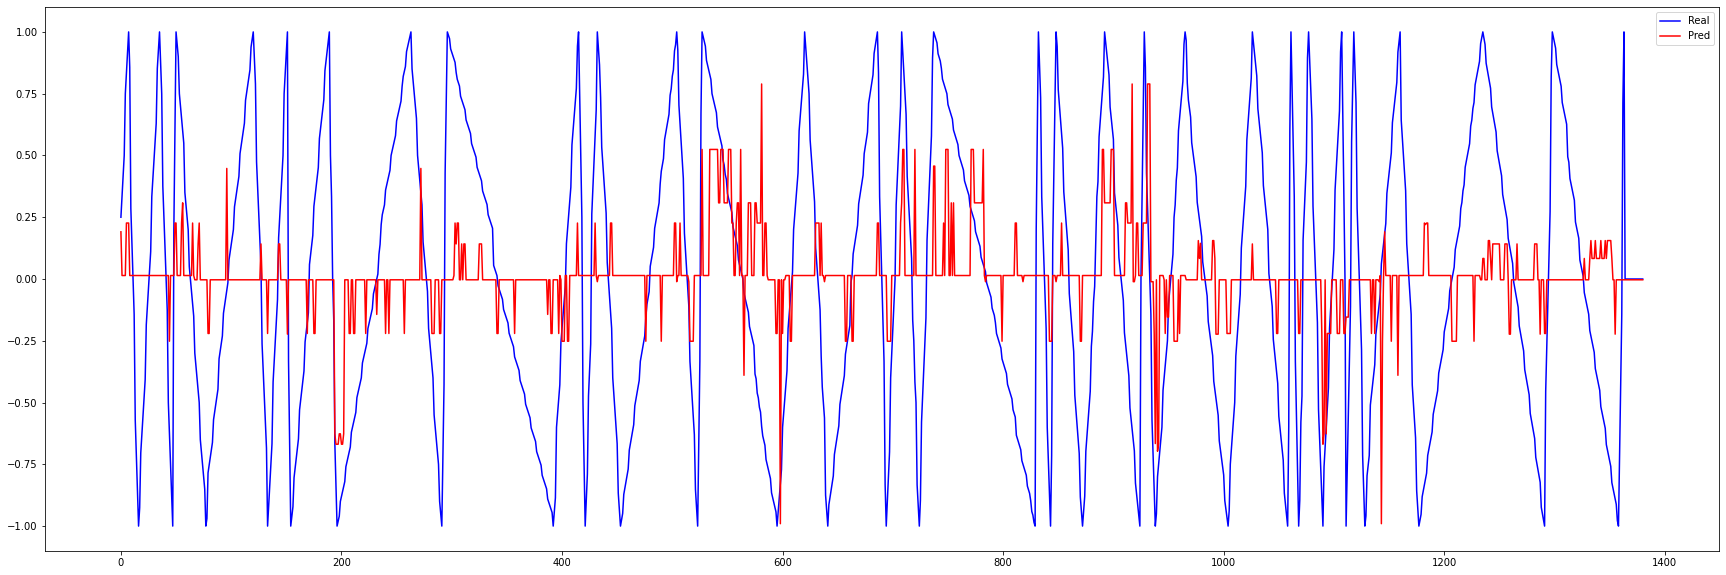

In [ ]:
plt.figure(figsize=(30,10))
plt.plot(score_table['real'], 'b-', label = 'Real')
plt.plot(score_table['pred'], 'r-', label = 'Pred')
plt.legend()
plt.show()

In [ ]:
print("Train MSE :", mean_squared_error(Y_train_pred, Y_train))
print("Test MSE :", mean_squared_error(Y_test_pred, Y_test))

Train MSE : 0.3245364846630044
Test MSE : 0.3204828848823643
